# **Redes Neurais e CNN: Identificação de Objetos**

Alunos: Ana Carolina da Silva, Gustavo Baroni Bruder, Luiz Gustavo Klitzke, Rodrigo Kapulka Franco, Nicole Bauchspiess 

Neste trabalho iremos fazer a identificação de um conjunto de dados de imagens de artigos de Zalando chamado Fashion-MNIST, que consiste em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes.

Fonte: https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pt-br

# **ATIVIDADE:**

**Descrição:**

Nesta atividade, você receberá um código de uma Rede Neural Artificial e uma Rede Neural Convolucional (CNN) implementada. Sua tarefa é analisar o código fornecido e fazer uma interpretação detalhada de cada linha, identificando e explicando as principais etapas, camadas e operações realizadas pela RNA e pela CNN.

**Instruções:**

1. Preencha o código com comentários em cada linha, explicando sua função e propósito.
2. Analise o código cuidadosamente para entender como a CNN é configurada.
3. Identifique e explique as camadas de convolução, camadas de pooling, camadas densas, funções de ativação, tamanhos dos filtros, número de neurônios, etc.
4. Identifique quais técnicas de regularização ou otimização formam utilizadas no código e explique como elas contribuem para o desempenho e a generalização do modelo.
5. Comente sobre a função de ativação utilizada na camada de saída.
6. Descreva os hiperparâmetros e ajustes do modelo, como a taxa de aprendizado, número de épocas de treinamento e o tratamento dos conjuntos de dados de treinamento e teste.
7. Faça uma avaliação descritiva dos resultados das Redes Neurais implementadas.



**Entregável:**

Prepare uma análise detalhada do código fornecido, destacando as principais características da CNN e como ela é configurada para a tarefa em questão. Se necessário, inclua observações sobre o potencial de melhoria ou otimização do modelo.

Esta atividade visa consolidar seu conhecimento sobre CNNs, ajudando a compreender como uma Rede Neural Convolucional é implementada e configurada para tarefas específicas.

In [1]:
#Import das bibliotecas base de tensor e keras
import tensorflow as tf
from tensorflow import keras

In [2]:
#Bibliotecas de auxílio para funções matemáticas e plots
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Importando base de dados

In [3]:
#Carrega o dataset "Fashion MNIST" do Keras - https://keras.io/api/datasets/fashion_mnist/
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
#Obtem os arrays contendo os dados de treino e de testes

# X = arrya de imagem em escala de cinza
# Y = labels correspondentes (inteiros de 0-9)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
#Demonstra o formatado dos arrays

#Dados de treino
print(X_train_full.shape)
print(y_train_full.shape)

#Dados de teste
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
# Transformar a escala para que os valores fiquem entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
#Relaciona nomes para cada umas das classes/labels providas pelo dataset
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta",
               "sandalia", "camiseta", "tenis", "bolsa", "bota"]

In [13]:
#Demonstra o nome da classe na posição 5 do array de treino, que é 9 = "bota"
nomes_classes[y_train[5]]

'bota'

In [15]:
#Demonstra o valor, ou representação em array 28x28, da imagem de treino na posição 5
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

bota


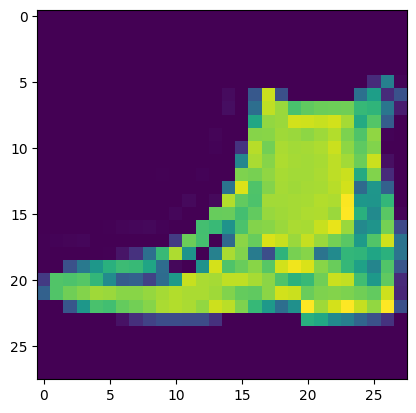

In [19]:
#Define qual index dos arrays de treino vamos usar de exemplo
exemplo_n = 5

#Printa o nome da classe da label presente na posição exemplo_n do array de treino - "bota"
print(nomes_classes[y_train[exemplo_n]])

#Mostra a imagem presente no array de treino, no mesmo index - uma bota :D
plt.imshow(X_train[exemplo_n], interpolation='nearest')
plt.show()

#  Rede Neural Artificial com Keras

In [32]:
#Criamos uma rede neural, sequindo o modelo sequencial - Uma pilha de camada, com cada camada tendo um tensor de entrada e um de saída
# https://keras.io/guides/sequential_model/
nn = keras.models.Sequential()

#Definição das camadas da rede:

#"Achata" as imagens de entrada de 28x28 em um array de uma dimensã
#https://keras.io/api/layers/reshaping_layers/flatten/
nn.add(keras.layers.Flatten(input_shape=[28, 28]))

#Camada "densa", com 300 neurônnios. Aplica uma função de ativação do tipo ReLU
# https://keras.io/api/layers/core_layers/dense/
nn.add(keras.layers.Dense(300, activation="relu"))

#Camada de "droput", busca previnir overfitting desativando aleatoriamente neurônios com uma frequência de 10%.
#https://keras.io/api/layers/regularization_layers/dropout/
nn.add(keras.layers.Dropout(rate=0.1))

#Mais uma camada densa, similar a anterio, porém, com 100 neurônios
nn.add(keras.layers.Dense(100, activation="relu"))

#Outra camada de dropout, também com frequência de 10%.
nn.add(keras.layers.Dropout(rate=0.1))

#Camada de saída da nossa rede, com 10 neurônios, correspondentes às 10 possíveis classificações.
#Aplica uma função de ativação do tipo "softmax", fazendo com que cada neurônio atue como uma demosntração da probabilidade do item pertencer a determinada classe.
nn.add(keras.layers.Dense(10, activation="softmax"))

#Print do resumo das configurações definidas para a rede
nn.summary()

c:\Users\luizk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando e treinando o modelo

In [33]:
%time

#Compila de fato a rede neural, definindo seus parâmetro principais.
#https://keras.io/api/models/model_training_apis/

nn.compile(loss="sparse_categorical_crossentropy", #Função de perda que mede a perda baseando-se na possibilidade de duas ou mais labels de sáida - https://keras.io/api/losses/probabilistic_losses/#sparse_categorical_crossentropy-function
           optimizer="sgd", #Otimiza a rede baseando-se em um gradiante decescrente, com momentum - https://keras.io/api/optimizers/sgd/
           metrics=["accuracy"]) #Define que a métrica a ser utilizada para julgar a performânce da rede será apenas sua acurácia - https://keras.io/api/metrics/

#Treina o modelo, pasando por 5 épocas e utilizandos os ados de treino e validação separados anteriormente
history_nn = nn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6561 - loss: 1.0589 - val_accuracy: 0.8330 - val_loss: 0.5062
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8110 - loss: 0.5473 - val_accuracy: 0.8454 - val_loss: 0.4460
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8301 - loss: 0.4899 - val_accuracy: 0.8600 - val_loss: 0.4107
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8408 - loss: 0.4480 - val_accuracy: 0.8638 - val_loss: 0.3942
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8501 - loss: 0.4222 - val_accuracy: 0.8698 - val_loss: 0.3740


### Visualizar a performance

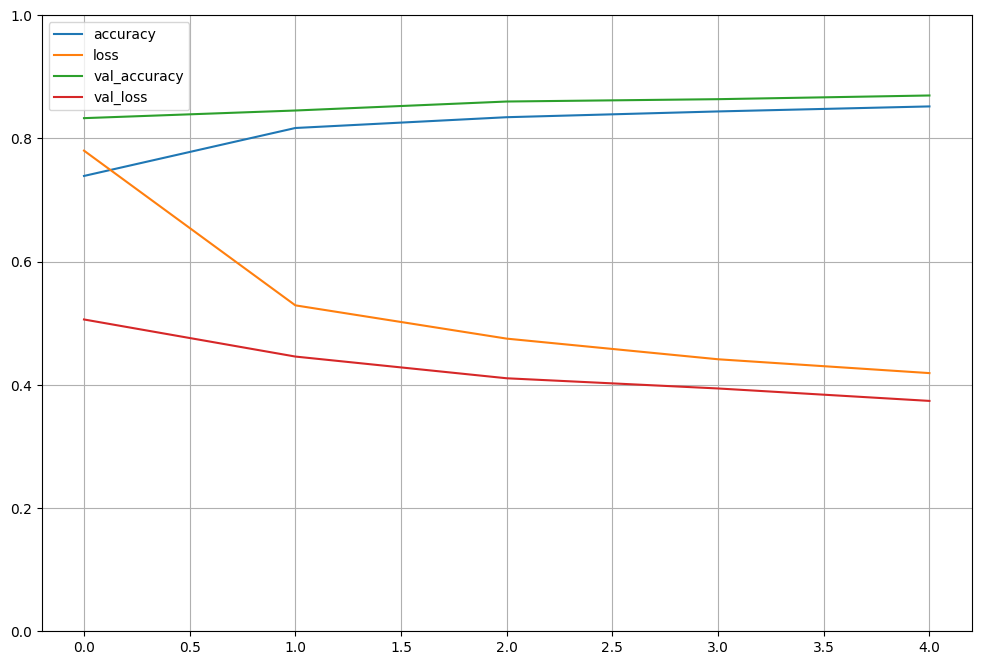

In [34]:
#Apresenta os dados da performânce do algoritmo, atráves do membro history, preenchido com a execução.

pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Avaliar o modelo

In [39]:
#Printa loss(perda) e accuracy(acurácia)
nn.evaluate(X_test, y_test,verbose=1)

#TODO - REAVALIAR ESSES RESULTADOS, QUE DECIDIRAM MUDAR E VER SE FAZ SENTIDO A ANÁLISE FEITA

#Com uma loss de 59.13, podemos dizer que o algoritmo apresente um erro alto entre o previsto e os rótulos verdadeiros.
#Uma acurácia de 0.83, indica que indica que cerca de 83% das entradas são calculadas corretamente.

#Como temos uma loss alta, mas também uma acurácia relativamente alta, parece que a rede acerta a maioria das vezes, mas quando comete erros, comete eles por uma grande margem.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8365 - loss: 55.7378


[59.130863189697266, 0.8306000232696533]

### Realizar uma Previsão

In [42]:
#Seleciona as primeiras 4 imagens de teste
X_novo = X_test[:4]

#Preve as labels para essas 4 imagens
y_proba = nn.predict(X_novo)

#Exibe as previsões de labels para cada os dados
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
#Extrai um array com a label com a maior probabilidade para a predição de cada um dos dados de X_novo
y_pred = np.argmax(nn.predict(X_novo), axis=-1)

#Mostra as labels numéricas
print(y_pred)

#Mostra os nomes de cada label
print(np.array(nomes_classes)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[9 2 1 1]
['bota' 'casaco' 'calca' 'calca']


### Verificar os resultados

In [43]:
#Pega os primeiros 4 resultados/labels do array de teste
y_novo = y_test[:4]

#Mostra as labels
print(y_novo)

#Mostra seys nomes
np.array(nomes_classes)[y_pred]

#Aqui, podemos ver que bate com o resultado anterior, obtido pelo predict da Rede :D

[9 2 1 1]


array(['bota', 'casaco', 'calca', 'calca'], dtype='<U10')

calca


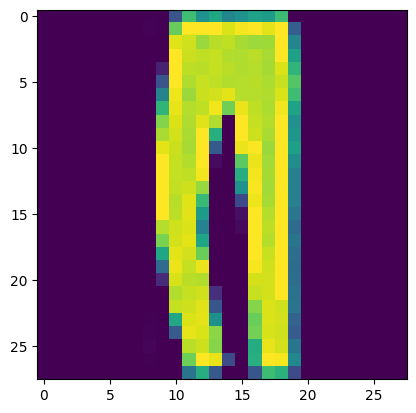

In [45]:
# example_n = 201

#Mostra o nome da label seguindo o predict da rede
print(nomes_classes[y_pred[2]])

#E sua imagem Correspondente
plt.imshow(X_novo[2], interpolation='nearest')
plt.show()

#Ambas apresentam uma calça

# Treinando CNN com Keras

In [28]:
cnn = keras.models.Sequential([
keras.layers.InputLayer(input_shape = (28,28,1)),
keras.layers.Conv2D(64,5, activation='relu', padding='same', kernel_initializer='glorot_uniform'),
keras.layers.MaxPool2D(2),
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
keras.layers.MaxPool2D(2),
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
keras.layers.MaxPool2D(2),
keras.layers.Flatten(),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(rate=0.5),
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(rate=0.5),
keras.layers.Dense(10, activation="softmax")])


c:\Users\luizk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [29]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 258)      │       297,474 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 258)      │       599,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 258)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2322)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       297,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,162 (5.44 MB)

 Trainable params: 1,426,162 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
print(X_train.shape)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_valid_new = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2],1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train_new.shape)

(55000, 28, 28)
(55000, 28, 28, 1)


In [31]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history_cnn = cnn.fit(X_train_new, y_train, epochs=20, validation_data=(X_valid_new, y_valid))

Epoch 1/20
  75/1719 ━━━━━━━━━━━━━━━━━━━━ 2:16 83ms/step - accuracy: 0.1090 - loss: 2.3005

KeyboardInterrupt: 

### Avaliar o modelo

In [ ]:
cnn.evaluate(X_test_new, y_test,verbose=1)

In [ ]:
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()